Start New Voting Classifier 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Heart_Disease_Classification_Dataset_Cleaned.csv')

In [3]:
scaler = MinMaxScaler(feature_range = (0, 1))

scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns = data.columns)

NameError: name 'data' is not defined

In [ ]:
X = scaled_data[:, 0:13]
y_label = scaled_data[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y_label, train_size = 0.8, stratify = y_label, random_state = 0)

0.8347107438016529
DecisionTreeClassifier(max_depth=1)
Acc. Score on Test : 0.8360655737704918


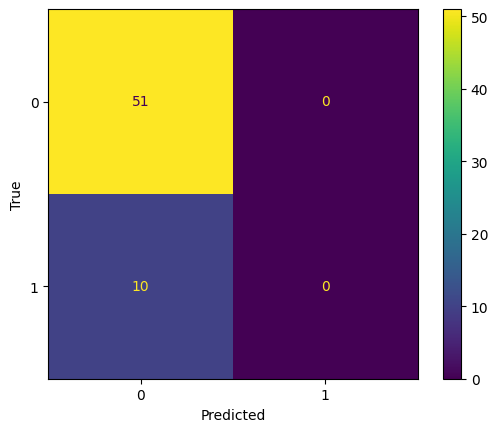

In [ ]:
# Decision Tree Classifier

parameters = {'max_depth':(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)} 
dtc = DecisionTreeClassifier() 
clf = GridSearchCV(dtc, parameters) 
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

0.8388429752066116
KNeighborsClassifier(n_neighbors=10)
Acc. Score on Test : 0.8360655737704918


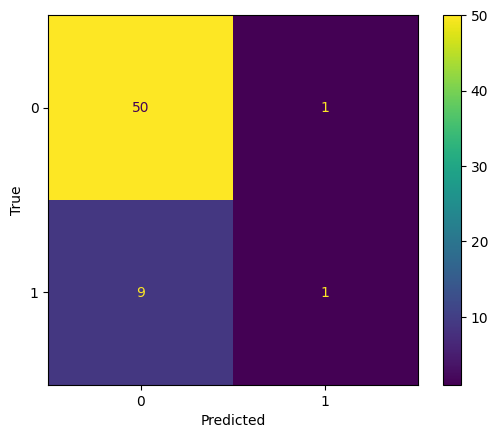

In [ ]:
# KNN

parameters = {'n_neighbors':(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)}
knn = KNeighborsClassifier() 
clf = GridSearchCV(knn, parameters) 
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

0.8347107438016529
LinearSVC(C=1)
Acc. Score on Test : 0.8360655737704918


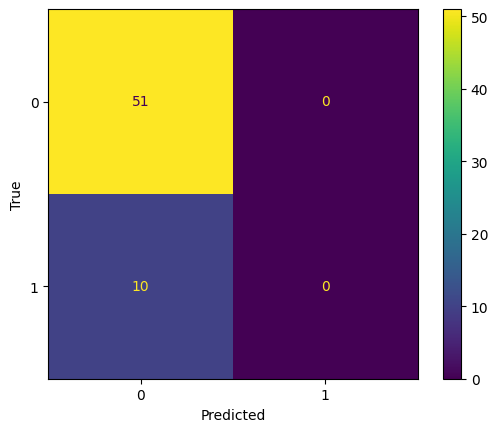

In [ ]:
# SVC

parameters = {'C':(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)} 
svc = LinearSVC() 
clf = GridSearchCV(svc, parameters) 
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

0.7066115702479339
Acc. Score on Test : 0.7540983606557377


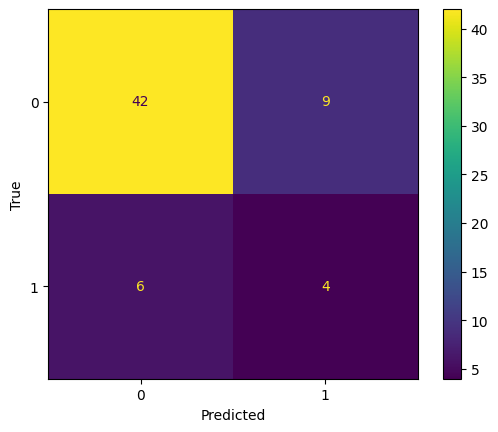

In [ ]:
# GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

0.9834710743801653
RandomForestClassifier(n_estimators=10)
Acc. Score on Test : 0.8032786885245902


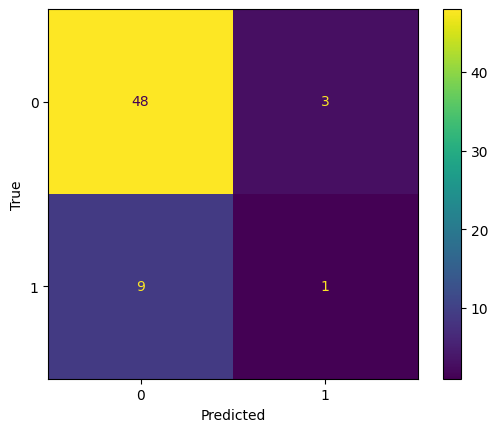

In [ ]:
# Random Forest

parameters = {'n_estimators':(10, 50, 100)}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters) 
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

0.8512396694214877
AdaBoostClassifier(learning_rate=0.1)
Acc. Score on Test : 0.819672131147541


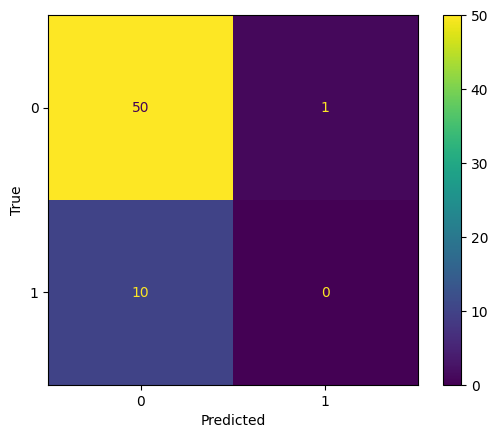

In [ ]:
# AdaBoost

parameters = {'learning_rate':(0.01, 0.1, 0.5, 1, 2), 'n_estimators':(10, 50, 100)}
ada = AdaBoostClassifier()
clf = GridSearchCV(ada, parameters)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

0.8760330578512396
BaggingClassifier(max_features=0.25, max_samples=0.25)
Acc. Score on Test : 0.8032786885245902


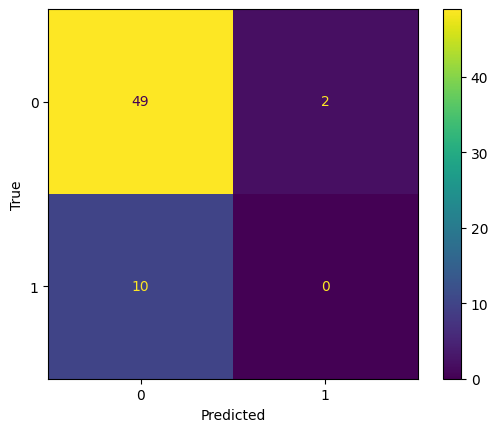

In [ ]:
# Bagging Classifier

parameters = {'n_estimators':(10, 50, 100), 'max_samples':(0.25, 0.5, 0.75, 1), 'max_features':(0.25, 0.5, 0.75, 1)}
bc = BaggingClassifier()
clf = GridSearchCV(bc, parameters)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_estimator_)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['0', '1'])
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score on Test :', accuracy_score(y_test, y_pred))

Hard Voting Classifier

In [ ]:
clf1H = DecisionTreeClassifier(max_depth = 1) #0.83
clf2H = KNeighborsClassifier(n_neighbors = 1) #0.80
clf3H = SVC(C = 3)#0.81
#clf4H = GaussianNB()#0.65
#clf5H = RandomForestClassifier(n_estimators = 100)#0.78
#clf6H = AdaBoostClassifier(learning_rate = 0.01 , n_estimators = 100)#0.83
#clf7H = BaggingClassifier(n_estimators = 100, max_samples = 0.25, max_features = 1)#0.80
eclfH = VotingClassifier(estimators = [('dt', clf1H), ('knn', clf2H), ('svc', clf3H)], 
                          voting = 'hard', weights = [1, 0.5, 0.5])

clf1H = clf1H.fit(X_train, y_train)
clf2H = clf2H.fit(X_train, y_train)
clf3H = clf3H.fit(X_train, y_train)
#clf4H = clf4H.fit(X_train, y_train)
#clf5H = clf5H.fit(X_train, y_train)
#clf6H = clf6H.fit(X_train, y_train)
#clf7H = clf7H.fit(X_train, y_train)
eclfH = eclfH.fit(X_train, y_train)

print(clf1H.score(X_train, y_train))
print(clf2H.score(X_train, y_train))
print(clf3H.score(X_train, y_train))
#print(clf4H.score(X_train, y_train))
#print(clf5H.score(X_train, y_train))
#print(clf6H.score(X_train, y_train))
#print(clf7H.score(X_train, y_train))
print(eclfH.score(X_train, y_train))

0.8347107438016529
1.0
0.8471074380165289
0.8347107438016529


Acc. Score : 0.8360655737704918
F1 Score : 0.0


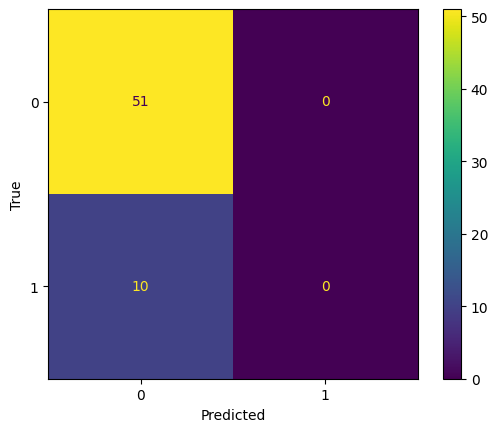

In [ ]:
y_pred_1H = clf1H.predict(X_test)
y_pred_2H = clf2H.predict(X_test)
y_pred_3H = clf3H.predict(X_test)
#y_pred_4H = clf4H.predict(X_test)
#y_pred_5H = clf5H.predict(X_test)
#y_pred_6H = clf6H.predict(X_test)
#y_pred_7H = clf7H.predict(X_test)
y_pred_ensembleH = eclfH.predict(X_test)

cf_matrixH = confusion_matrix(y_test, y_pred_ensembleH)
cmdH = ConfusionMatrixDisplay(cf_matrixH)
cmdH.plot()
cmdH.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score :', accuracy_score(y_test, y_pred_ensembleH))

print('F1 Score :', f1_score(y_test, y_pred_ensembleH))

Soft Voting Classifier

In [ ]:
clf1S = DecisionTreeClassifier(max_depth = 1)
clf2S = KNeighborsClassifier(n_neighbors = 9)
#clf3S = LinearSVC(C = 1)
clf4S = GaussianNB()
#clf5S = RandomForestClassifier(n_estimators = 50)
#clf6S = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 10)
#clf7S = BaggingClassifier(n_estimators = 100, max_samples = 0.25, max_features = 0.25)
eclfS = VotingClassifier(estimators = [('dt', clf1S), ('knn', clf2S), ('gnb', clf4S)],
                        voting = 'soft', weights = [1, 0.5, 1]) 

clf1S = clf1S.fit(X_train, y_train)
clf2S = clf2S.fit(X_train, y_train)
#clf3S = clf3S.fit(X_train, y_train)
clf4S = clf4S.fit(X_train, y_train)
#clf5S = clf5S.fit(X_train, y_train)
#clf6S = clf6S.fit(X_train, y_train)
#clf7S = clf7S.fit(X_train, y_train)
eclfS = eclfS.fit(X_train, y_train)

print(clf1S.score(X_train, y_train))
print(clf2S.score(X_train, y_train))
#print(clf3S.score(X_train, y_train))
print(clf4S.score(X_train, y_train))
#print(clf5S.score(X_train, y_train))
#print(clf6S.score(X_train, y_train))
#print(clf7S.score(X_train, y_train))
print(eclfS.score(X_train, y_train))

0.8347107438016529
0.8223140495867769
0.7066115702479339
0.8140495867768595


Acc. Score : 0.7868852459016393
F1 Score : 0.23529411764705882


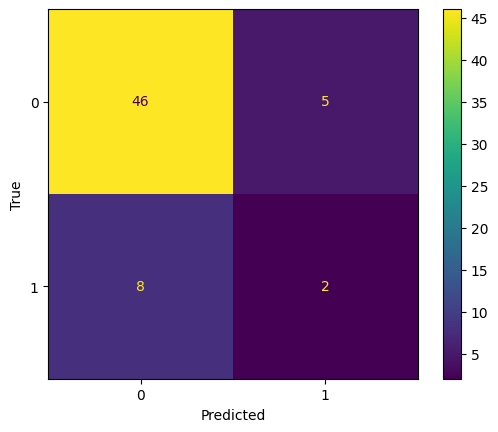

In [ ]:
y_pred_1S = clf1S.predict(X_test)
y_pred_2S = clf2S.predict(X_test)
#y_pred_3S = clf3S.predict(X_test)
y_pred_4S = clf4S.predict(X_test)
#y_pred_5S = clf5S.predict(X_test)
#y_pred_6S = clf6S.predict(X_test)
#y_pred_7S = clf7S.predict(X_test)
y_pred_ensembleS = eclfS.predict(X_test)

cf_matrixS = confusion_matrix(y_test, y_pred_ensembleS)
cmdS = ConfusionMatrixDisplay(cf_matrixS)
cmdS.plot()
cmdS.ax_.set(xlabel = 'Predicted', ylabel = 'True')

print('Acc. Score :', accuracy_score(y_test, y_pred_ensembleS))

print('F1 Score :', f1_score(y_test, y_pred_ensembleS))

Neural Network